In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [79]:
df = pd.read_csv("/content/homicide.csv")

In [80]:
df.head()

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012


In [81]:
df.shape

(195, 6)

**Replace Missing Values**

In [82]:
df.isnull().sum()
df.dropna(subset = ['Subregion'], inplace = True)

In [83]:
df.dtypes

Location      object
Region        object
Subregion     object
Rate         float64
Count          int64
Year           int64
dtype: object

**Transform Type Data**

In [84]:
df['Rate'] = df['Rate'].astype(int)

In [85]:
my_list = ['Rate', 'Count', 'Year']

for i in my_list:
  print(i)
  df[i] = df[i].astype(int)

Rate
Count
Year


In [86]:
df.dtypes

Location     object
Region       object
Subregion    object
Rate          int64
Count         int64
Year          int64
dtype: object

In [87]:
df.head()

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Angola,Africa,Middle Africa,4,1217,2012


**Replace Values & Add Column Region**

In [88]:
df['Region'].replace('Americas', 'N/S America', inplace = True)

In [89]:
df1 = df.sort_values('Count', ascending = False).reset_index(drop = True)
df1.head(10)

,Location,Region,Subregion,Rate,Count,Year
0,Brazil,N/S America,South America,22,47722,2020
1,Nigeria,Africa,Western Africa,22,44200,2019
2,India,Asia,Southern Asia,3,40651,2020
3,Mexico,N/S America,Central America,28,36579,2020
4,United States,N/S America,Northern America,6,21570,2020
5,South Africa,Africa,Southern Africa,33,19846,2020
6,Myanmar,Asia,South-Eastern Asia,28,15299,2021
7,Colombia,N/S America,South America,22,11520,2020
8,Russia,Europe,Eastern Europe,7,10697,2020
9,Venezuela,N/S America,South America,36,10598,2018


**Growth Trend**

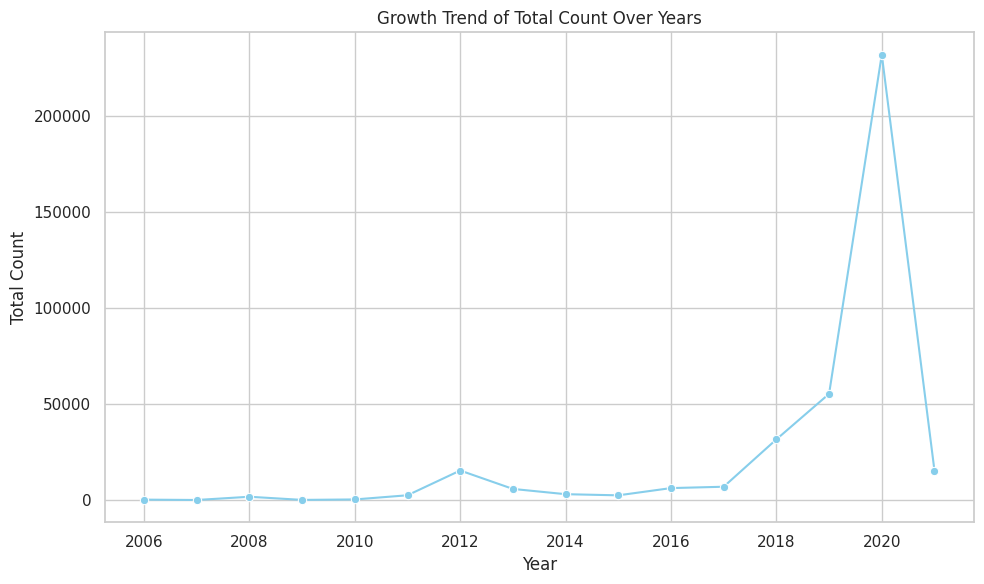

In [90]:
# Grouping data by year and summing the counts
df_yearly = df.groupby('Year')['Count'].sum().reset_index()

# Plotting the growth trend
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.lineplot(data=df_yearly, x='Year', y='Count', marker='o', color='skyblue')

# Title and labels
plt.title('Growth Trend of Total Count Over Years')
plt.xlabel('Year')
plt.ylabel('Total Count')

# Show plot
plt.tight_layout()
plt.show()

# Percentage of Counts by Location

In [13]:
df1 = df[['Location', 'Count']].sort_values(by = 'Count', ascending = False).reset_index(drop = True).head()
df1['Perc'] = (df1['Count'] * 100 / df1['Count'].sum()).round(2)
df1

,Location,Count,Perc
0,Brazil,47722,25.02
1,Nigeria,44200,23.18
2,India,40651,21.31
3,Mexico,36579,19.18
4,United States,21570,11.31


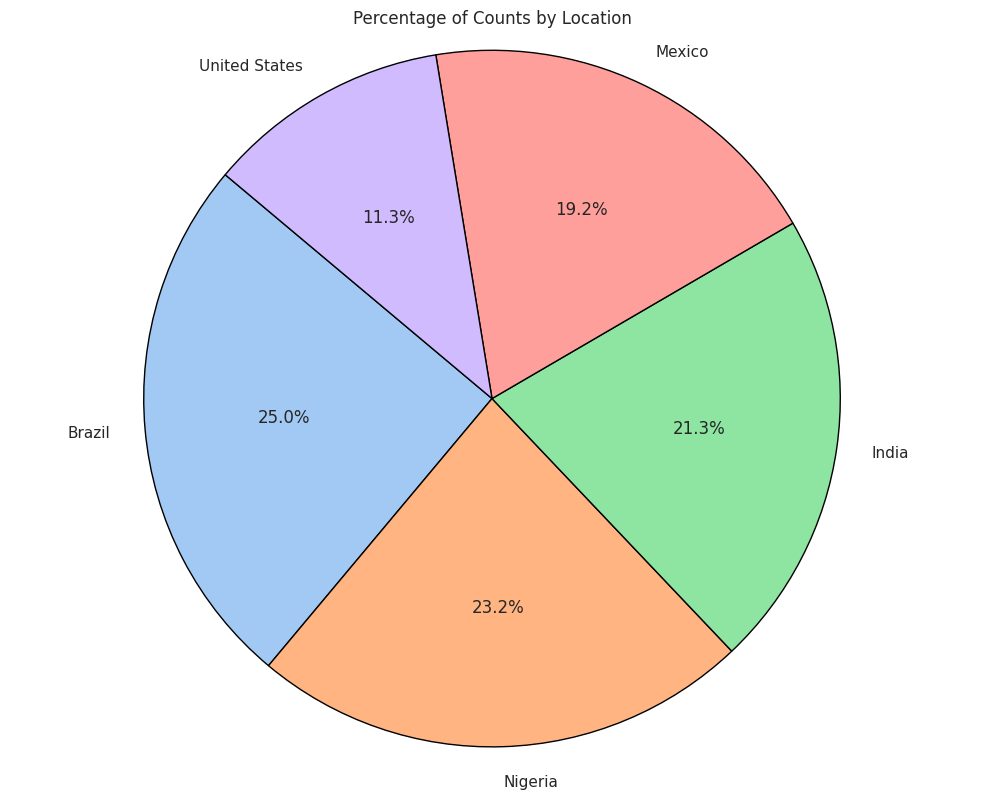

In [22]:
# Data
locations = df1['Location']
counts = df1['Count']

# Plot
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")
plt.pie(counts, labels=locations, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"), wedgeprops={'edgecolor': 'black'})

# Title
plt.title('Percentage of Counts by Location')

# Show plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

# Total Count by Region

In [15]:
df2 = df.groupby('Region')['Count'].sum().sort_values(ascending = False)
df2

Region
N/S America    153597
Asia           105552
Africa          99481
Europe          19869
Oceania           347
Name: Count, dtype: int64

<ipython-input-93-d7136031614c>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




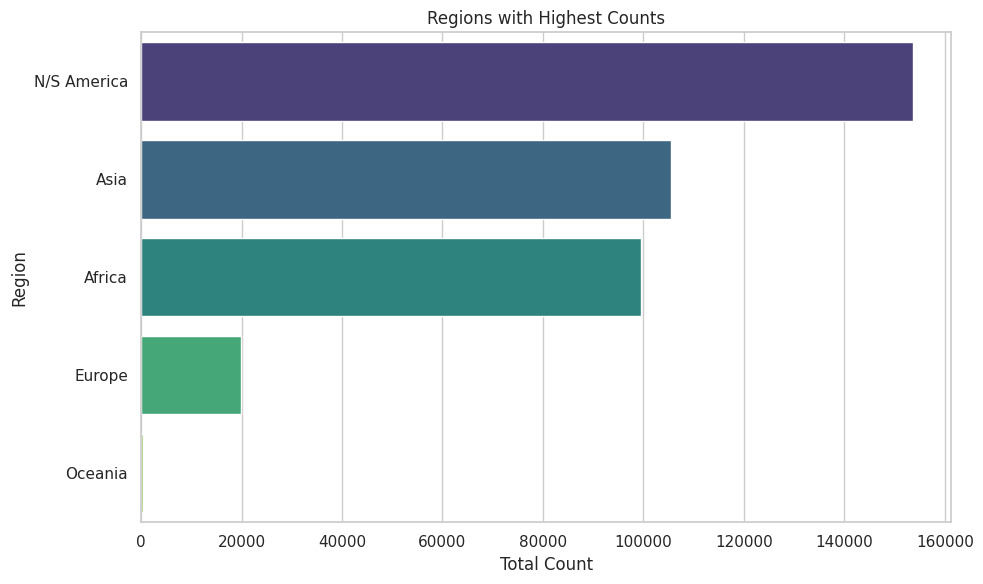

In [93]:
# Plotting the regions with the highest counts
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(x=df2.values, y=df2.index, palette="viridis")

# Title and labels
plt.title('Regions with Highest Counts')
plt.xlabel('Total Count')
plt.ylabel('Region')

# Show plot
plt.tight_layout()
plt.show()

# Total Count by Subregion

In [17]:
df3 = df.groupby('Subregion')['Count'].sum().sort_values(ascending = False)
df3

Subregion
South America             78872
Southern Asia             58631
Central America           47371
Western Africa            46318
South-Eastern Asia        25314
Eastern Africa            23669
Northern America          22317
Southern Africa           21479
Eastern Europe            14604
Western Asia              11638
Eastern Asia               8563
Northern Africa            5538
Caribbean                  5037
Middle Africa              2477
Northern Europe            2097
Western Europe             2075
Central Asia               1406
Southern Europe            1093
Australia, New Zealand      347
Name: Count, dtype: int64

<ipython-input-18-9630fbde4cf4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df3.values, y=df3.index, palette="viridis")


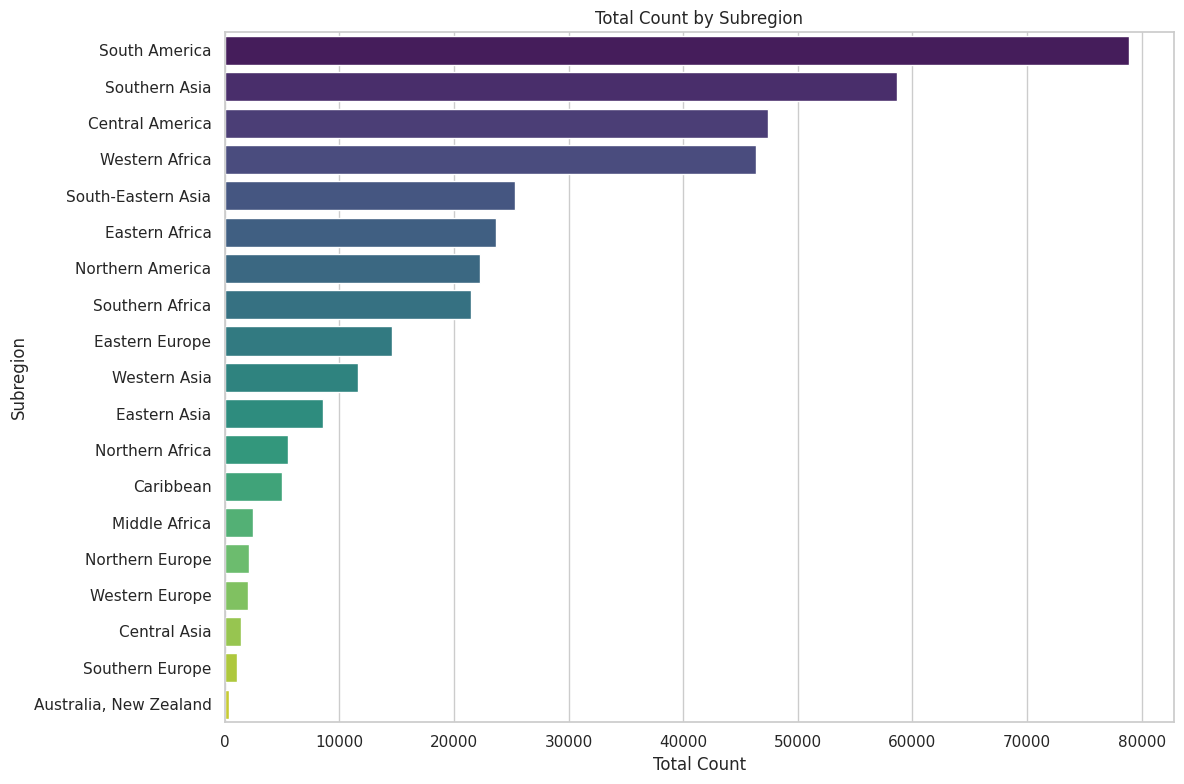

In [18]:
# Set style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=df3.values, y=df3.index, palette="viridis")

# Title and labels
plt.title('Total Count by Subregion')
plt.xlabel('Total Count')
plt.ylabel('Subregion')

# Show plot
plt.tight_layout()
plt.show()


In [19]:
df.Year.value_counts()

2020    94
2019    20
2018    13
2012    11
2017    10
2016     9
2015     9
2009     6
2014     5
2013     5
2011     5
2010     3
2006     2
2007     1
2021     1
2008     1
Name: Year, dtype: int64

**Asia and Europe**

In [20]:
df[df['Region'].isin(['Asia', 'Europe'])]

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
3,Andorra,Europe,Southern Europe,2,2,2020
8,Armenia,Asia,Western Asia,1,52,2020
11,Austria,Europe,Western Europe,0,65,2020
...,...,...,...,...,...,...
183,United Arab Emirates,Asia,Western Asia,0,64,2019
184,United Kingdom,Europe,Northern Europe,1,755,2018
189,Uzbekistan,Asia,Central Asia,1,396,2019
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011


In [26]:
df4 = df[(df['Region'] == 'Asia') | (df['Region'] == 'Europe')]
df4

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
3,Andorra,Europe,Southern Europe,2,2,2020
8,Armenia,Asia,Western Asia,1,52,2020
11,Austria,Europe,Western Europe,0,65,2020
...,...,...,...,...,...,...
183,United Arab Emirates,Asia,Western Asia,0,64,2019
184,United Kingdom,Europe,Northern Europe,1,755,2018
189,Uzbekistan,Asia,Central Asia,1,396,2019
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011


# Count Over Years by Region

In [29]:
df4 = df4[df4['Year']>2016][['Region', 'Year', 'Count']]

In [30]:
df4

,Region,Year,Count
0,Asia,2018,2474
1,Europe,2020,61
3,Europe,2020,2
8,Asia,2020,52
11,Europe,2020,65
...,...,...,...
178,Asia,2020,2095
182,Europe,2017,2751
183,Asia,2019,64
184,Europe,2018,755


In [41]:
df4 = df4.groupby(['Region', 'Year']).sum()['Count']
df4

Region  Year
Asia    2017     1787
        2018    16923
        2019     6458
        2020    53516
        2021    15299
Europe  2017     3670
        2018      883
        2019      249
        2020    15066
Name: Count, dtype: int64

In [42]:
df_unstacked = df4.unstack(level = 0)
df_unstacked

Region,Asia,Europe
Year,,
2017,1787.0,3670.0
2018,16923.0,883.0
2019,6458.0,249.0
2020,53516.0,15066.0
2021,15299.0,NaN


In [44]:
df_unstacked.index = df_unstacked.index.astype(int).astype(str)


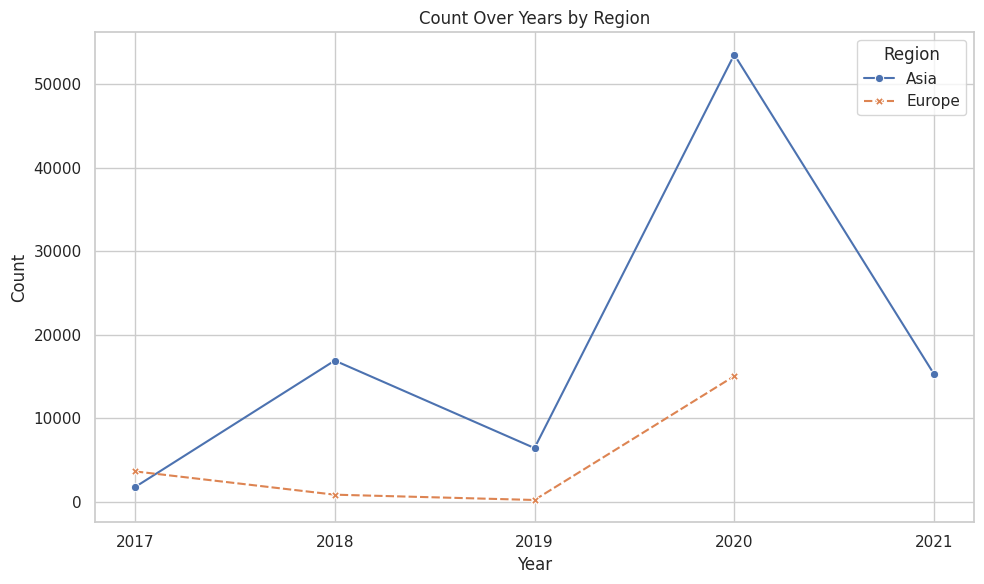

In [45]:
# Plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.lineplot(data=df_unstacked, markers=True)

# Title and labels
plt.title('Count Over Years by Region')
plt.xlabel('Year')
plt.ylabel('Count')

# Show plot
plt.tight_layout()
plt.legend(title='Region')
plt.show()

# Total Rate by Year

In [46]:
df5 = df.groupby(['Year'])['Rate'].sum().sort_values(ascending = False)
df5

Year
2020    564
2019    153
2012    113
2016     76
2018     64
2015     55
2014     52
2009     36
2021     28
2017     27
2013     20
2007     19
2010     18
2006     12
2011      8
2008      5
Name: Rate, dtype: int64

<ipython-input-47-44615a2ff966>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df5.index, y=df5.values, palette="viridis")


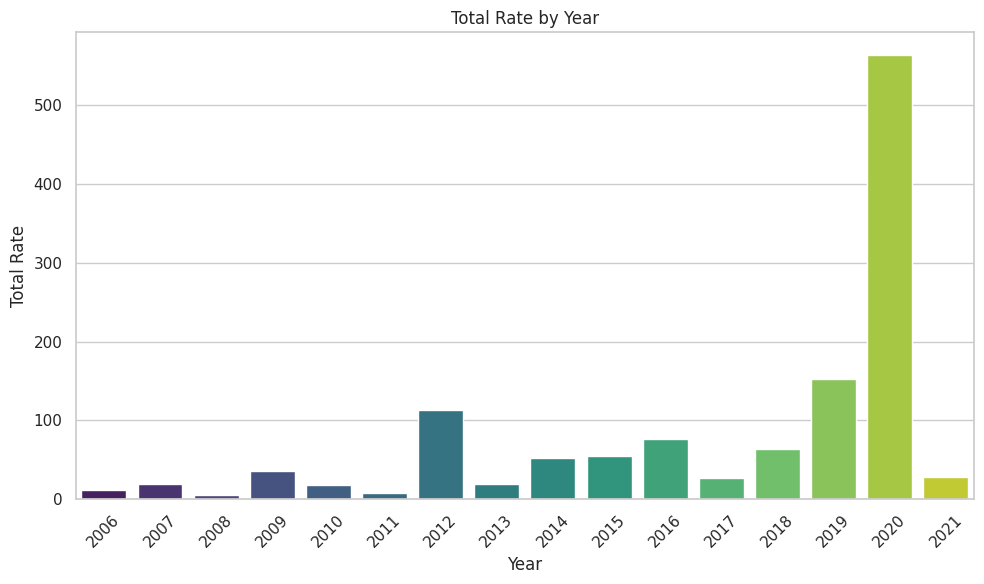

In [47]:
# Plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(x=df5.index, y=df5.values, palette="viridis")

# Title and labels
plt.title('Total Rate by Year')
plt.xlabel('Year')
plt.ylabel('Total Rate')

# Rotate x-labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

# Total Count by Year and Region

In [58]:
df6 = df[['Year', 'Region', 'Count']]
df6.groupby(['Year', 'Region']).sum().sort_values(by = 'Year', ascending = False)
df6

,Year,Region,Count
0,2018,Asia,2474
1,2020,Europe,61
2,2020,Africa,580
3,2020,Europe,2
4,2012,Africa,1217
...,...,...,...
190,2018,N/S America,10598
191,2011,Asia,1358
192,2013,Asia,1703
193,2015,Africa,853


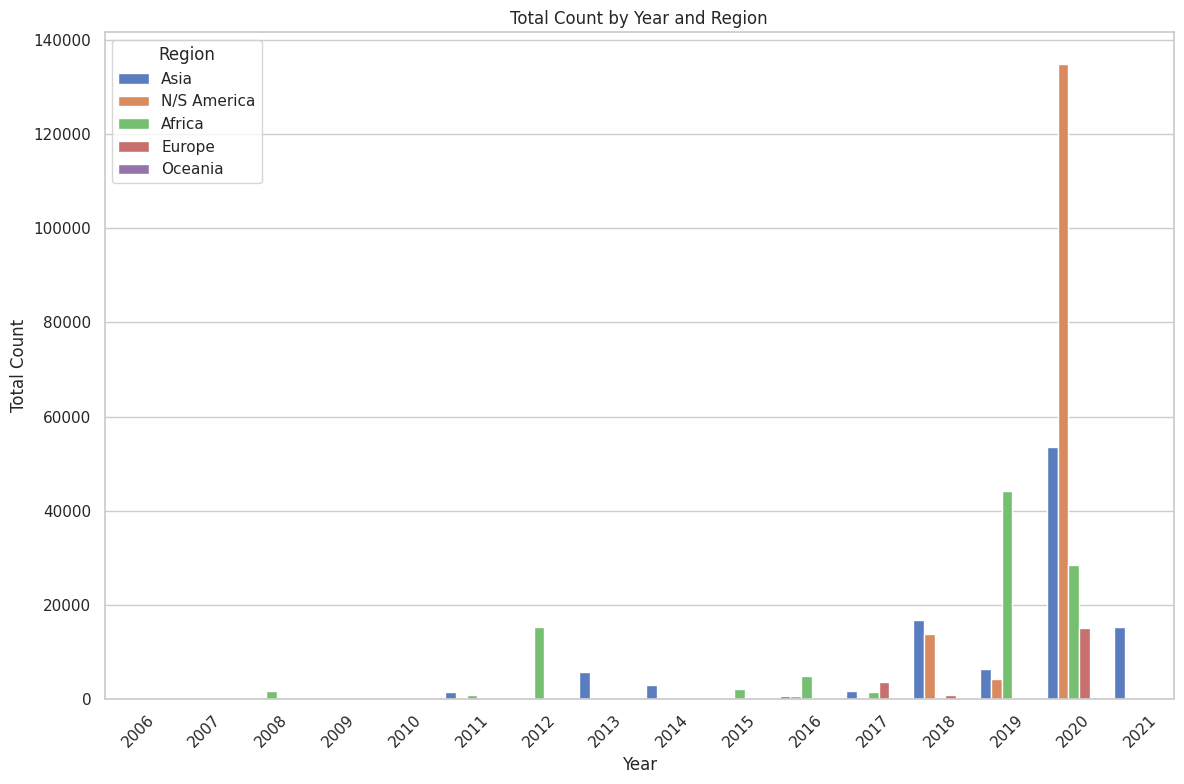

In [55]:
# Grouping and summing the counts
df6_grouped = df6.groupby(['Year', 'Region']).sum().reset_index()

# Plot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.barplot(x='Year', y='Count', hue='Region', data=df6_grouped, palette='muted')

# Title and labels
plt.title('Total Count by Year and Region')
plt.xlabel('Year')
plt.ylabel('Total Count')

# Rotate x-labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.legend(title='Region')
plt.show()

# Mean Count by Subregion

In [63]:
df7 = df.groupby('Subregion')['Count'].mean().sort_values(ascending = False).round(2)
df7

Subregion
Southern Asia             6514.56
South America             6067.08
Central America           5921.38
Northern America          4463.40
Southern Africa           4295.80
Western Africa            4210.73
South-Eastern Asia        2531.40
Eastern Africa            1577.93
Eastern Europe            1460.40
Eastern Asia              1223.29
Northern Africa           1107.60
Middle Africa              619.25
Western Asia               581.90
Central Asia               281.20
Western Europe             230.56
Caribbean                  201.48
Australia, New Zealand     173.50
Northern Europe            139.80
Southern Europe             64.29
Name: Count, dtype: float64

In [64]:
data = {
    'Category':df7.index,
    'Value':df7.values,
    'Info':df7.values
}
df = pd.DataFrame(data)
df

,Category,Value,Info
0,Southern Asia,6514.56,6514.56
1,South America,6067.08,6067.08
2,Central America,5921.38,5921.38
3,Northern America,4463.40,4463.40
4,Southern Africa,4295.80,4295.80
5,Western Africa,4210.73,4210.73
6,South-Eastern Asia,2531.40,2531.40
7,Eastern Africa,1577.93,1577.93
8,Eastern Europe,1460.40,1460.40
9,Eastern Asia,1223.29,1223.29


In [71]:
# Create treemap chart
fig = px.treemap(df, path=['Category'], values='Value', hover_data=['Info'])

# Update Traces
fig.update_traces(hovertemplate = 'Category: %(label)<br>Value:%{value}')

# Update layout
fig.update_layout(title='Mean Count by Subregion',
                  margin=dict(t=50, l=0, r=0, b=0))

# Show plot
fig.show()

Based on the data analysis that has been done, the following conclusions can be drawn:

1. Growth Trends: There is a significant growth trend in the overall number from year to year. This indicates that the calculated entities in this dataset have increased over time.

2. Highest Number Region: N/S America, Asia, and Africa are the highest number regions. This shows that the number of entities counted tends to be higher in these regions compared to other regions.

3. Trend Forecasting by Region: Based on trend analysis by region, it can be predicted that some regions such as Asia and N/S America are likely to have significant year-on-year growth, while other regions may experience greater fluctuations.

4. Subregions with the Highest Average Number: Some subregions have a higher average number than others. This suggests that some areas may become the focus of more attention in future analysis or planning.

5. Prediction: It can be predicted that the overall number will continue to increase in the future. However, these predictions can be influenced by various factors such as population growth, changes in economic conditions, and other social factors.